In [35]:
import random
import pandas as pd
import math
import matplotlib.pyplot as plt

In [36]:
class customer:
    def __init__(self, NO):
        self.NO = NO # customer ID
        self.arrival = 0.0 
        self.service_time = 0.0 
        self.server = server('None', 2) #server who served the customer
        self.end = 0.0 
        self.waiting_time = 0.0
    def __eq__(self, other):
        return self.NO == other.NO
class server:
    def __init__(self, id, status = 0):
        self.id = id
        self.status = status #0 means idle and 1 means busy
        self.SVR = 0.0 #servers serving time
    def __eq__(self, other):
        return self.id == other.id
def st(): # calculates the service time of a customer using python function
    return random.uniform(st_range[0], st_range[1])

def at(Tnow): # calculates the arrival time of a customer
    return random.uniform(arr_range[0], arr_range[1]) + Tnow

In [37]:
#calculates the minimum value of ith column of my_list list
def min_lst(my_list, i):
    #starting from infinity and iterating over list to find global min
    min_value = float('inf')
    for sublist in my_list:
        
        # Compare the first element of each sublist to find the minimum
        if sublist[i] < min_value:
            min_value = sublist[i]
    return min_value
#calculates the minimum value of ith column of my_list list
def max_lst(my_list, i):
    max_value = float('-inf')
    #starting from -infinity and iterating over list to find global max
    # Iterate over each sublist in my_list
    for sublist in my_list:
        # Compare the first element of each sublist to find the maximum
        if sublist[i] > max_value:
            max_value = sublist[i]
        return max_value

In [38]:
#normalizing profit variable using linear method
def normalize_profit(x_ij, min, max):
    result = (x_ij - min) / (max - min)
    return result

#normalizing cost variable using linear method
def normalize_cost(x_ij, min, max):
    result = (max - x_ij) / (max - min)
    return result


In [39]:
#checks if there are any free servers and randomly chooses one
def free_server(servers):
    free_servers = []
    #getting free servers
    for server in servers:
        if server.status == 0:
            free_servers.append(server)
            
    #handling no free server
    if not free_servers:
        result = False
    #randomly choosing a free server
    else:   

        result = random.choice(free_servers)
    return result
        

In [40]:
#executes the arrival event 
def arrival(i):
    global FEL, Q, Tnow, customers, Queue, MTOT, served_customers
    # defining new customer
    c = customer(i)
    MTOT += 1 #updating total number of customer
    c.arrival = at(Tnow) #calculating new customer's arrival time
    arr_time = c.arrival
    customers.append(c) #adding new customer to the list of customer
    FEL.append([0, arr_time, c]) #adding new customer arrival event to FEL list
    FEL = sorted(FEL, key=lambda x: x[1])  # Sort based on arrival time
    chosen_server = free_server(servers) #choosing a free server
    if not chosen_server: #if there is no free server add the customer to the queue
        Q = Q + 1
        Queue.append(customers[i - 1])

    else: #if a free server was found 
        chosen_server.status = 1 #update the server's status
        customers[i - 1].service_time = st() #calculate the service time for the customer given in FEL
        customers[i - 1].end = Tnow + customers[i - 1].service_time #calculate the end time for the customer given in FEL
        customers[i - 1].server = chosen_server #assigning the serving server to the customer
        chosen_server.SVR += customers[i - 1].service_time #updating server's serving time
        served_customers += 1  #update the customers whose been served
        FEL.append([customers[i - 1].server.id, customers[i - 1].end, customers[i - 1]]) #adding an end event to the FEL
        FEL = sorted(FEL, key=lambda x: x[1])  # Sort based on end time


In [41]:
def departure(server, customer): #executes the departure event
    global Q, FEL, Tnow, Queue,TWT, served_customers
    
    if Q > 0:
        #if there is a queue, serve the first in queue and assign it to the server whom customer is leaving the system 
        Q = Q - 1
        #calculating values for a customer who've been served (like in arrival when there is a free server)
        Queue[0].waiting_time = Tnow - Queue[0].arrival
        TWT += Queue[0].waiting_time
        Queue[0].service_time = st()
        Queue[0].end = Tnow + Queue[0].service_time
        Queue[0].server = server
        server.SVR += Queue[0].service_time
        served_customers += 1
        FEL.append([Queue[0].server.id, Queue[0].end, Queue[0]])
        FEL = sorted(FEL, key=lambda x: x[1])  # Sort based on end time
        Queue.pop(0) #popping the first customer in line becuase they've been served
    else:
        #if there is no queue update the server's status
        server.status = 0
    
        

In [42]:
# checking if a customer has been stayed in line of not (because of python error)
def waiting_line(wait):
    if abs(wait) < 0.1:
        result = 'No'
    else:
        result = 'Yes'
    return result

In [43]:
#Simulation Controller
#number of servers that we want to calculate up to that
number_of_servers = 10
#defining the result matrix
results = []
#calculating the 
for k in range(1,number_of_servers + 1):
    temp_lst = []
    for j in range(10):
        FEL = []
        Queue = []
        customers = []
        
        Tnow = 0
        Q = 0
        MTOT = 0
        TWT = 0
        served_customers = 0
        servers = []
        st_range = (6,10) #range of service time (in min)
        arr_range = (0,4) #range of arrival time (in min)
        T = 8 * 60 #total time of simulation (in min)
        #creating servers
        for i in range(1, k + 1):
            s = server(i, 0)
            servers.append(s)
        c1 = customer(0) #defining first customer
        c1.arrival = 0
        customers.append(c1)
        FEL.append([0,0,c1]) #adding first arrival to FEL
        FEL = sorted(FEL, key=lambda x: x[1])  # Sort based on end time
        i = 1 #number of customers
        #FEL loop
        while True:
            temp = FEL.pop(0) #removing FEL's executed element
            Tnow = temp[1] #updating Tnow
            if T >= Tnow:
                
                if temp[0] == 0: #if event code is 0, execute arrival
                    arrival(i)
                    i = i + 1
                else:
                    #departure 
                    departure(temp[2].server, temp[2])
            else:
                break
        sum_utilization = 0 #sum of utilization of all servers
        for serverr in servers:
            sum_utilization += serverr.SVR
        Total_time = customers[served_customers - 1].end #time last customer leaving counted as Total time 
        Utilization = sum_utilization / Total_time * 100 / k #finding utilization by averaging all servers utilizations
        temp_lst.append([Utilization, TWT / served_customers]) #calculating average waiting time and adding to result list
    results.append(temp_lst)
            
        

## results

In [44]:
#this is result of all the runs for all number of servers 
results

[[[100.0, 172.35803987857165],
  [100.0, 181.30652507343376],
  [100.0, 174.90108250110595],
  [100.0, 178.88395207602446],
  [100.0, 174.36898872336587],
  [100.0, 181.2456885101928],
  [100.0, 178.14919213403073],
  [100.0, 170.15741221530797],
  [100.0, 179.93087690156167],
  [100.0, 183.4248013474219]],
 [[99.19751315323757, 112.45634315733017],
  [99.1911599767289, 127.84984038912646],
  [98.97712600139002, 117.9564012933117],
  [99.49629295708158, 119.74001711309242],
  [99.7984693694334, 112.81465275316341],
  [98.89121323828259, 129.08113720441378],
  [99.49276024411856, 112.57125510686544],
  [99.61517401948245, 120.48450702655309],
  [99.45995041110926, 112.43850532901122],
  [99.55604553918977, 109.46780093260548]],
 [[99.20527974141679, 58.67766122023059],
  [98.91486969344676, 58.57492214951479],
  [98.85707955200036, 61.549678888648415],
  [99.1230795189591, 54.816834992858375],
  [99.08491106359988, 68.3625450398805],
  [98.94525985200899, 42.14491747399794],
  [99.15176

In [45]:
#this contains the average of each number of servers
averaged_result = []
for serverrr in results:
    temp1 = 0
    temp2 = 0
    for u in range(len(serverrr)):
        
        temp1 += serverrr[u][0]
        temp2 += serverrr[u][1]
    averaged_result.append([temp1 /10, temp2/10])

In [46]:
averaged_result

[[100.0, 177.4726559361017],
 [99.36757049100541, 117.48604603054733],
 [99.11562056060102, 57.967106589344645],
 [96.46191807865156, 6.926509640456864],
 [79.35987855408624, 0.5661575892217054],
 [66.46149739898482, 0.13257462116605342],
 [56.909510446265685, 0.03651765413708216],
 [49.660545103914885, 0.009007302176170606],
 [44.664467935013064, 0.000778725629739191],
 [39.16294963835749, 2.989831430321827e-05]]

In [47]:
normalized_result = []
ut_min = min_lst(averaged_result,0)
#normalizing both criterias using normalize_profit and normalize_cost functions giving them min and max of wanted columns using minn_lst and max_lst
for i in averaged_result:
    normalized_result.append([normalize_profit(i[0], min_lst(averaged_result,0), max_lst(averaged_result,0)), normalize_cost(i[1], min_lst(averaged_result,1), max_lst(averaged_result,1))])

In [48]:
normalized_result

[[1.0, 0.0],
 [0.9896045336643517, 0.33800485880443354],
 [0.9854631440192804, 0.6733745480348726],
 [0.941843302719042, 0.960971559970788],
 [0.6607310623506615, 0.9968100562686953],
 [0.4487158334987086, 0.99925315398881],
 [0.2917064634530231, 0.9997944034714683],
 [0.17255266984765064, 0.9999494152756834],
 [0.09043039174240207, 0.9999957806038476],
 [0.0, 1.0]]

In [49]:
x_values = [i for i in range(1, len(normalized_result) + 1)]
y1_values = [row[0] for row in normalized_result] #utilization
y2_values = [row[1] for row in normalized_result] #average waiting time
optimal_y = sum_list = [x + y for x, y in zip(y1_values, y2_values)] #utility function
optimal_y

[1.0,
 1.3276093924687853,
 1.658837692054153,
 1.90281486268983,
 1.6575411186193567,
 1.4479689874875186,
 1.2915008669244914,
 1.172502085123334,
 1.0904261723462496,
 1.0]

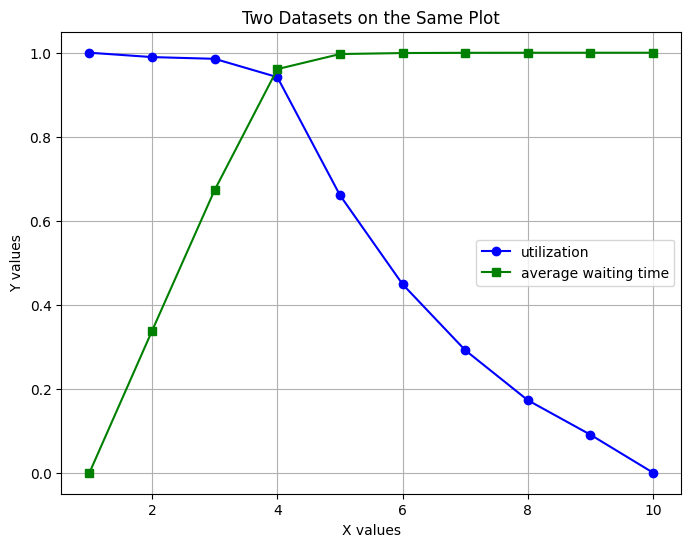

In [50]:
# Plotting both datasets on the same plot
plt.figure(figsize=(8, 6))  # Set the figure size (width, height) in inches

# Plot the first dataset
plt.plot(x_values, y1_values, label='utilization', color='blue', marker='o')

# Plot the second dataset
plt.plot(x_values, y2_values, label='average waiting time', color='green', marker='s')

# Set plot title and labels
plt.title('Two Datasets on the Same Plot')
plt.xlabel('X values')
plt.ylabel('Y values')

# Display legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()

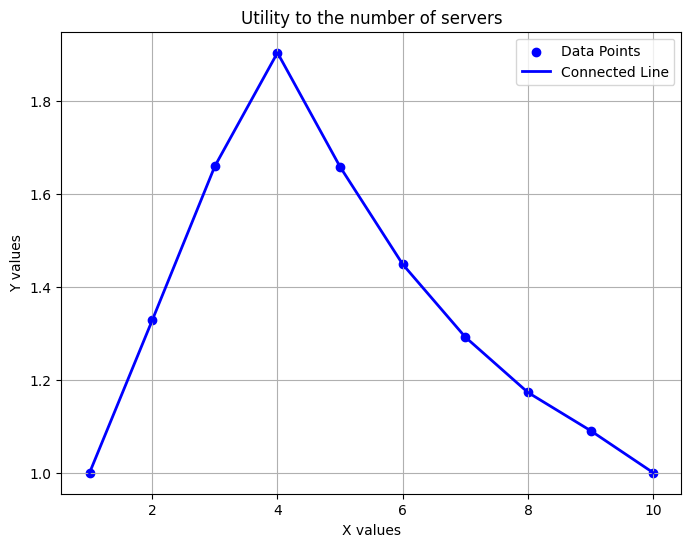

In [51]:
# Plotting the data as a scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size (width, height) in inches
plt.scatter(x_values, optimal_y, color='blue', label='Data Points')  # Create a scatter plot
plt.title('Utility to the number of servers')  # Set the title of the plot
plt.xlabel('X values')  # Set the label for the x-axis
plt.ylabel('Y values')  # Set the label for the y-axis
plt.plot(x_values, optimal_y, color='blue', linestyle='-', linewidth=2, label='Connected Line')
plt.legend()  # Show legend (if labels are specified)
plt.grid(True)  # Show grid
plt.show()  # Display the plot